In [105]:
import numpy as np
from sklearn.metrics import accuracy_score
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd

In [29]:
x = np.random.randn(2000) * 2
x = np.sort(x)

In [30]:
y = np.log(1 + np.exp(-1 * x))

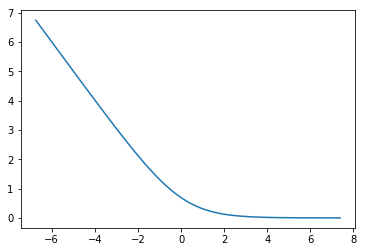

In [31]:
plt.plot(x, y)
plt.show()

In [33]:
yy = 1 / (1 + np.exp(-x))

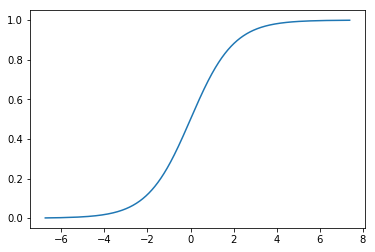

In [34]:
plt.plot(x, yy)
plt.show()

In [90]:
N = 1000

In [91]:
def sign0(x):
    return ((x > 0).astype(np.int32) - 0.5) * 2

def sign1(x):
    return (x > 0).astype(np.int32)

In [97]:
def generate_data(seed, N):
    np.random.seed(seed)
    x1 = np.random.randn(N).reshape(-1, 1)
    x11 = np.square(x1)
    x2 = np.random.randn(N).reshape(-1, 1)
    x22 = np.square(x2)
    noise = np.random.randint(10, size=N).reshape(-1, 1)
#     print(noise)
    noise = (noise < 1).astype(np.int32)
#     print(noise)
    y = sign0(x11 + x22 - 0.6)
#     print(y)
    noise = -2 * noise * y
    y = sign1(y + noise)
#     print(y)
#     return np.hstack((np.ones((N,1)), x1, x2, x1*x2, x11, x22, y))
#     return np.hstack((np.ones((N,1)), x1, x2, y))
    return np.hstack((np.ones((N,1)), x11, x22, y))

In [98]:
data = generate_data(1, N)
# print(data[:5,:])

In [99]:
# data
# print(data.shape)

In [103]:
from sklearn.linear_model import LinearRegression
c = 10
acc = 0
score = 0
for i in range(c):
    seed = i+10000
    data = generate_data(seed, N)
    lr = LinearRegression()
    lr.fit(data[:,:-1], data[:,-1])
    pred = lr.predict(data[:,:-1])
    a = accuracy_score(sign1(pred), data[:,-1])
    print(a)
    acc = acc + a
#     score = score + lr.score(data[:, :-1], data[:,-1])
print(acc / c)
# print(score / c)
# lr.intercept_, coef_

0.712
0.704
0.675
0.685
0.692
0.683
0.682
0.679
0.702
0.683
0.6897


In [96]:
print(lr.intercept_, lr.coef_)

0.515021670099838 [ 0.          0.0028303   0.02372063 -0.00050137  0.08397211  0.0853726 ]


In [49]:
dir(lr)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_preprocess_data',
 '_residues',
 '_set_intercept',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [50]:
print(lr.score())

TypeError: score() missing 2 required positional arguments: 'X' and 'y'

In [51]:
lr.score(data[:,:-1], data[:,-1])

0.1203330437254837

In [208]:
train = pd.read_csv(
    "hw3_train.dat", 
    header=None, 
    sep=" "
)
test = pd.read_csv(
    "hw3_test.dat", 
    header=None, 
    sep=" "
)

In [209]:
# train.head(20)

In [210]:
train = train.iloc[:,1:]
train = np.hstack([np.ones((train.shape[0],1)), train.values])
# print(train[:5,:])
# print(train.shape)
test = test.iloc[:,1:]
test = np.hstack([np.ones((test.shape[0],1)), test.values])
# print(test[:5,:])
# print(test.shape)

In [256]:
# w = np.random.randn(train.shape[1]-1).reshape(-1, 1)
# print(w.shape)
w = np.zeros((train.shape[1]-1, 1))

In [257]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [258]:
T = 2000
ita = 0.001

In [259]:
# d = train.shape[1] - 1
# N = train.shape[0]
# for i in range(T):
#     e = np.zeros((d, 1))
#     for j in range(N):
#         x = train[j, :-1].reshape(-1, 1)
#         y = train[j, -1]
#         e = e + sigmoid(-1 * y * np.dot(w.T, x)) * (-1 * y * x)
#     e = e / N
#     w = w - ita * e

In [260]:
d = train.shape[1] - 1
N = train.shape[0]
j = -1
for i in range(T):
#     e = np.zeros((d, 1))
#     for j in range(N):
#         x = train[j, :-1].reshape(-1, 1)
#         y = train[j, -1]
    j = (j + 1) % N
    x = train[j, :-1].reshape(-1, 1)
    y = train[j, -1]
    e = sigmoid(-1 * y * np.dot(w.T, x)) * (-1 * y * x)
    w = w - ita * e

In [261]:
print(w.shape)

(21, 1)


In [262]:
pred = np.dot(test[:,:-1], w)
# print(pred)
a = sign0(pred)
b = (a != test[:,-1].reshape(-1, 1)).astype(np.int32)
# print(np.sum(b))
print(np.sum(b) / test.shape[0])
# a = sign1(pred) != test[:,-1].reshape(-1, 1)
# b = a.astype(np.int32)
# print(a)

0.473
